In [1]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [13]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.yna.co.kr/theme/mostviewed/index'
driver.get(url)

In [19]:
#container > div > div.content03 > section > div > ul > li:nth-child(1) > div > div > strong > a > span
columns = ['순위', '기사 제목', '기사 작성일']
rank = []
title = []
journal = []
date = []
for i in range(1, 20):
  rank.append(i)
  title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) + ') > div > div > strong > a > span').text)
  #container > div > div.content03 > section > div > ul > li:nth-child(2) > div > div > strong > a > span
  date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) +') > div > div > span').text)


In [20]:
import pandas as pd
df = pd.DataFrame({columns[0]: rank,
columns[1]: title,
columns[2]: date}, columns=columns)

df.head()

,순위,기사 제목,기사 작성일
0,1,"HLB 간암신약, 미 FDA 승인 재차 불발…""보완요구서 받아""(종합)",2025-03-20 19:26
1,2,尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망,2025-03-20 22:00
2,3,"오만전 승리 놓친 홍명보 감독 ""수비수들은 문제없었다""(종합)",2025-03-20 16:02
3,4,전국 대체로 맑고 포근…수도권 미세먼지 '나쁨',2025-03-20 20:24
4,5,"젠슨황 ""양자컴 기업 상장된 줄 몰랐다…20년 내겐 긴시간 아냐""",2025-03-20 20:19


In [21]:
df.to_csv('top20_news.csv', index=False)

In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,720 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 127727 files and dire

In [27]:
import csv

f = open('top20_news.csv', 'r')
rdr = csv.reader(f)

title = ''

for line in rdr:
  title = title + ' ' + line[1]

f.close()
print(title)

 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 전국 대체로 맑고 포근…수도권 미세먼지 '나쁨' 젠슨황 "양자컴 기업 상장된 줄 몰랐다…20년 내겐 긴시간 아냐" 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 '황희찬 선제골' 홍명보호, 북중미 월드컵 예선 오만과 1-1 비겨(종합) '尹체포 저지' 김성훈 경호차장 구속 갈림길…오늘 영장심사 [재산공개] 이상민 前 장관, 1년 만에 6억5천만원 증가한 46억원 의대생의 호소 "복귀자 공격 도 넘어…복귀 방해는 학습권 침해" 39년된 울진 온정버스터미널 문닫나…전국 민영터미널 폐업 속출 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼 권성동, 尹지지자 조문…"가슴 아픈 일 없도록 하겠다" 'K-달걀' 미국 식탁에 더많이 오른다…美 "한국산 달걀 더 수입"(종합) 김혜경 "법인카드 유용 기소유예 취소해달라" 헌법소원 "제주 항공권 화∼목 저녁이 최저가" 한은 직원의 경제학적 분석 러-우크라 부분휴전, 서명까지 갈까…다가오는 '진실의 순간' 뉴욕증시, 비둘기였지만 찜찜한 FOMC 여파…동반 하락 마감 EU정상들, 우크라 지원 합의 실패…'종전특사' 이견에 언성도(종합)


In [28]:
title = title[6:]
print(title)


 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 전국 대체로 맑고 포근…수도권 미세먼지 '나쁨' 젠슨황 "양자컴 기업 상장된 줄 몰랐다…20년 내겐 긴시간 아냐" 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 '황희찬 선제골' 홍명보호, 북중미 월드컵 예선 오만과 1-1 비겨(종합) '尹체포 저지' 김성훈 경호차장 구속 갈림길…오늘 영장심사 [재산공개] 이상민 前 장관, 1년 만에 6억5천만원 증가한 46억원 의대생의 호소 "복귀자 공격 도 넘어…복귀 방해는 학습권 침해" 39년된 울진 온정버스터미널 문닫나…전국 민영터미널 폐업 속출 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼 권성동, 尹지지자 조문…"가슴 아픈 일 없도록 하겠다" 'K-달걀' 미국 식탁에 더많이 오른다…美 "한국산 달걀 더 수입"(종합) 김혜경 "법인카드 유용 기소유예 취소해달라" 헌법소원 "제주 항공권 화∼목 저녁이 최저가" 한은 직원의 경제학적 분석 러-우크라 부분휴전, 서명까지 갈까…다가오는 '진실의 순간' 뉴욕증시, 비둘기였지만 찜찜한 FOMC 여파…동반 하락 마감 EU정상들, 우크라 지원 합의 실패…'종전특사' 이견에 언성도(종합)


In [29]:
!pip install konlpy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 29.4 MB/s eta 0:00:00


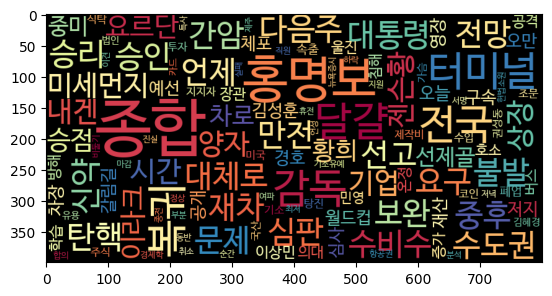

In [30]:
okt = Okt()

nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

#워드클라우드 생성하기

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [34]:
#인구통계
import pandas as pd

df = pd.read_csv('인구통계.csv', encoding = 'cp949')

columns = list(df.columns)

del columns[1]
popDiff = [ ]

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2, len(df.loc[i])):
    pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])
    row.append(pop)
  popDiff.append(row)

dfPopDiff = pd.DataFrame(popDiff, columns=columns)
dfPopDiff.to_csv('인구차이.csv', encoding='cp949')

columns = list(df.columns)

del columns[1]
popIncreaseRate = [ ]

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2 , len(df.loc[i])):
    pop = float((int(df.loc[i][j])-int(df.loc[i][j-1]))/int(df.loc[i][j-1])) * 100.0
    row.append(pop)
  popIncreaseRate.append(row)

dfPopIncreaseRate = pd.DataFrame(popIncreaseRate, columns=columns)
dfPopIncreaseRate.to_csv('인구증감비율.csv', encoding='cp949', index=False)

<ipython-input-34-f2356b71b5d6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-34-f2356b71b5d6>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])
<ipython-input-34-f2356b71b5d6>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-34-f2356b71b5d6>:29: FutureWarning: Series.__getitem__ treating keys as positions is 

In [47]:
import pandas as pd

df = pd.read_csv('인구차이.csv', encoding = 'cp949')

popDiff = [ ]

for i in range(0, len(df)):
  popDiff.append(list(df.loc[i]))

#x축에 표시할 값
x_values = [ ]

for i in range(1, 7):
  yyyymm = '20240' + str(i)
  x_values.append(yyyymm)

#월 증감 인구수를 지역별 변수 y에 대입하기
y_seoul = popDiff[0][108:114]
y_bs = popDiff[1][108:114]
y_dg = popDiff[2][108:114]
y_ic = popDiff[3][108:114]
y_gj = popDiff[4][108:114]
y_dj = popDiff[5][108:114]
y_us = popDiff[6][108:114]
y_sj = popDiff[7][108:114]
y_gg = popDiff[8][108:114]
y_gw = popDiff[9][108:114]
y_cb = popDiff[10][108:114]
y_cn = popDiff[11][108:114]
y_jb = popDiff[12][108:114]
y_jn = popDiff[13][108:114]
y_gb = popDiff[14][108:114]
y_gn = popDiff[15][108:114]
y_jj = popDiff[16][108:114]

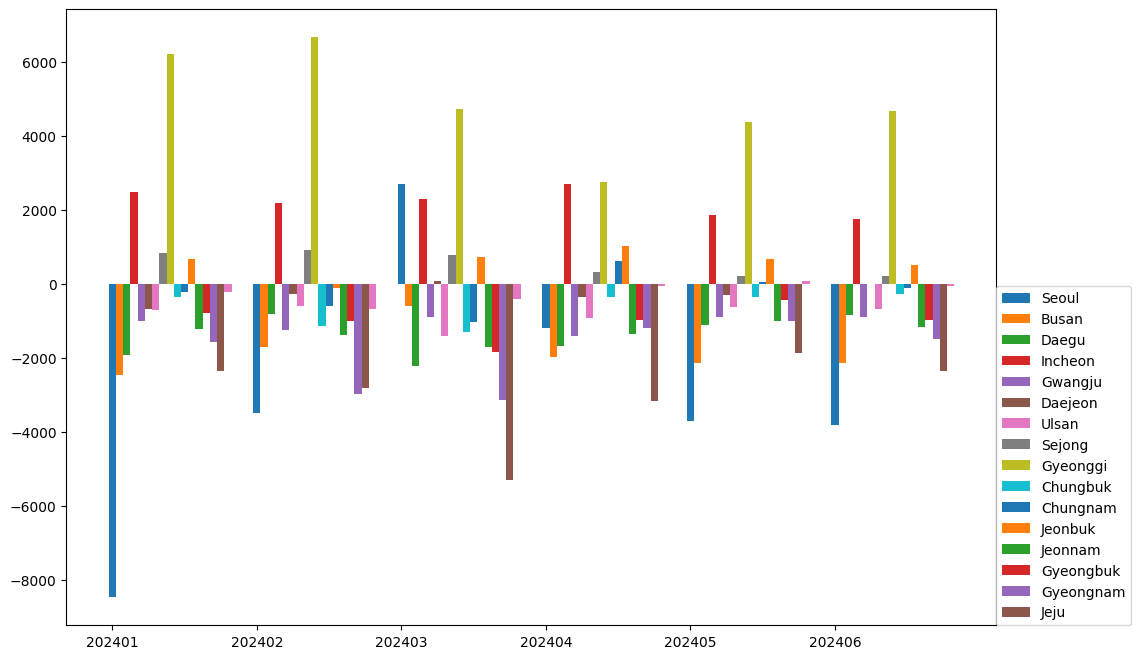

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))

ax = plt.subplot( )
bar_width = 0.05

x = np.arange(6)
ax.set_xticks(x)
ax.set_xticklabels(x_values)

p1 = plt.bar(x, y_seoul, bar_width)
p2 = plt.bar(x + bar_width, y_bs, bar_width)
p3 = plt.bar(x + bar_width*2, y_dg, bar_width)
p4 = plt.bar(x + bar_width*3, y_ic, bar_width)
p5 = plt.bar(x + bar_width*4, y_gj, bar_width)
p6 = plt.bar(x + bar_width*5, y_dj, bar_width)
p7 = plt.bar(x + bar_width*6, y_us, bar_width)
p8 = plt.bar(x + bar_width*7, y_sj, bar_width)
p9 = plt.bar(x + bar_width*8, y_gg, bar_width)
p10 = plt.bar(x + bar_width*9, y_gw, bar_width)
p11 = plt.bar(x + bar_width*10, y_cb, bar_width)
p12 = plt.bar(x + bar_width*11, y_cn, bar_width)
p13 = plt.bar(x + bar_width*12, y_jb, bar_width)
p14 = plt.bar(x + bar_width*13, y_jn, bar_width)
p15 = plt.bar(x + bar_width*14, y_gb, bar_width)
p16 = plt.bar(x + bar_width*15, y_gn, bar_width)
p17 = plt.bar(x + bar_width*16, y_jj, bar_width)

plt.legend(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], loc = (1.0, 0))
plt.show( )